In [23]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.stats import sigma_clip
import lightkurve as lk
import astropy.units as u
from astropy import stats
import time as datetime
from lightkurve import periodogram
from astropy.convolution import Box1DKernel, convolve
from tqdm import tqdm_notebook as tqdm
from scipy import ndimage as nd
import re
plt.rcParams.update({'figure.max_open_warning': 0})
import warnings
warnings.filterwarnings("ignore")

#Import all needed packages 

In [28]:
cd /Users/hamil/Documents/TESSFiles 

C:\Users\hamil\Documents\TESSFiles


In [104]:
cand1 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand2 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand3 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand4 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand5 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand6 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand7 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand8 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand9 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand10 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand11 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand12 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand13 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00370324073-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand14 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand15 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')


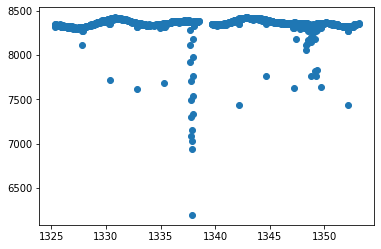

In [66]:
hdul = fits.open(cand1)
dataset = hdul[1].data
time1 = dataset['TIME']
flux1 = dataset['FLUX_RAW']
sect = hdul[0].header['SECTOR']
camera = hdul[0].header['CAMERA']
CCD = hdul[0].header['CCD']

plt.scatter(time1,flux1)
plt.show()

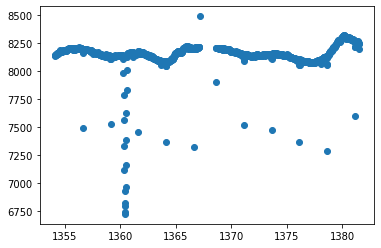

In [67]:
hdul = fits.open(cand2)
dataset = hdul[1].data
time2 = dataset['TIME']
flux2 = dataset['FLUX_RAW']
sect = hdul[0].header['SECTOR']
camera = hdul[0].header['CAMERA']
CCD = hdul[0].header['CCD']

plt.scatter(time,flux)
plt.show()

Text(0.5, 1.0, 'Original Logged Power Spectrum Sector 1')

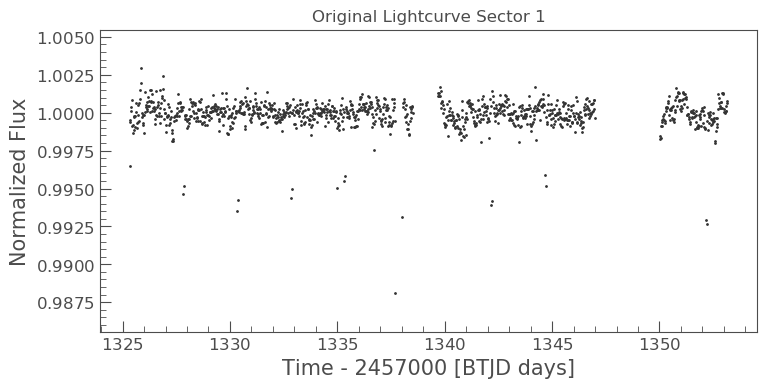

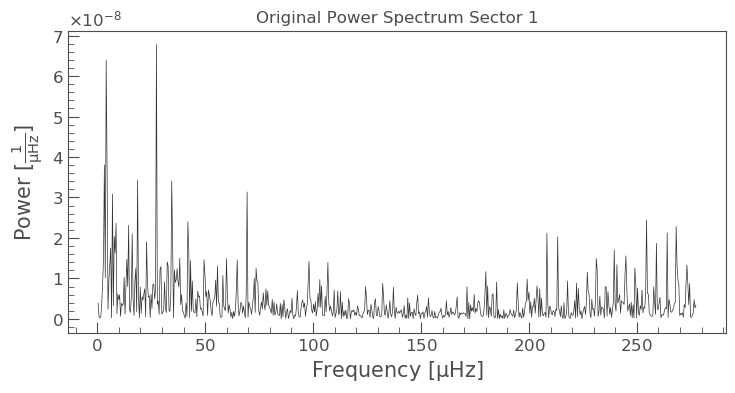

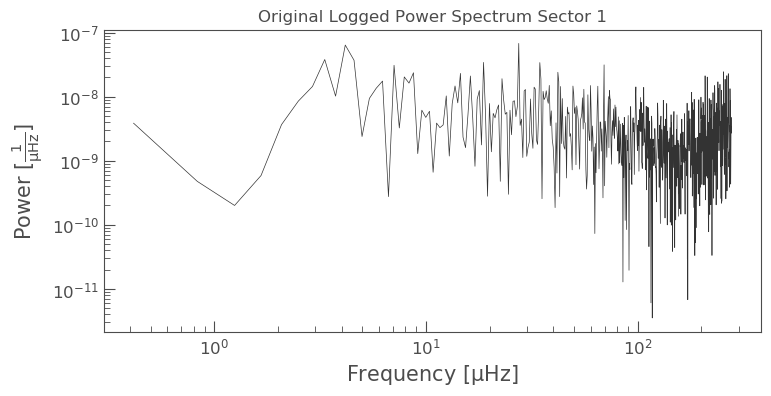

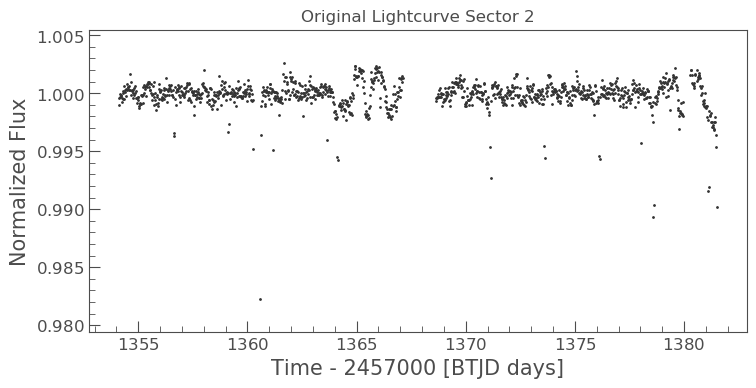

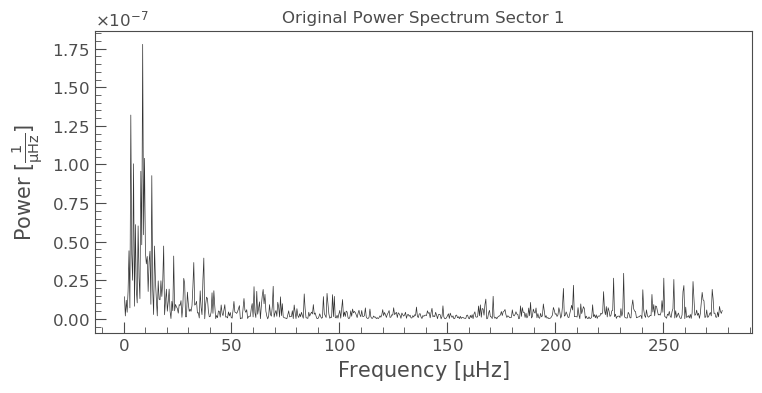

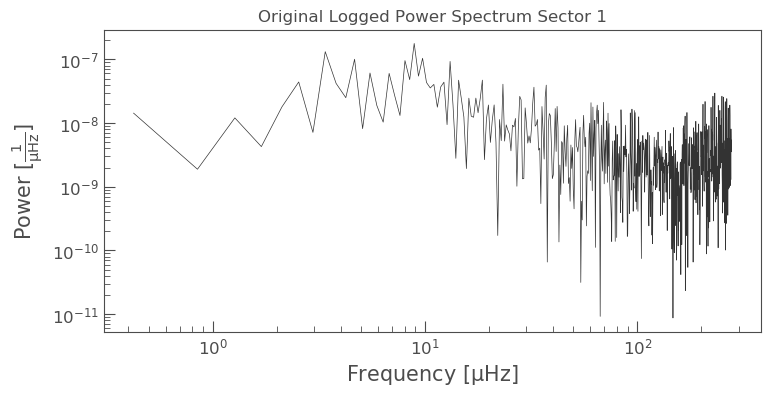

In [105]:
#Now for real stuff...

#Clip the large systematic
condition = ((time1 > 1347) & (time1 < 1350))
flux1[condition] = np.nan


model1 = lk.TessLightCurve(time1,flux1).normalize().remove_outliers(sigma_lower=3, sigma_upper =3).remove_nans().flatten(window_length=145)
power1 = model1.to_periodogram(method='lombscargle', normalization="psd")
model1.scatter()
plt.title('Original Lightcurve Sector 1')
power1.plot()
plt.title('Original Power Spectrum Sector 1')
power1.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')

model2 = lk.TessLightCurve(time2,flux2).normalize().remove_outliers(sigma_lower=3, sigma_upper=3).remove_nans().flatten(window_length=145)
power2 = model2.to_periodogram(method='lombscargle', normalization="psd")
model2.scatter()
plt.title('Original Lightcurve Sector 2')
power2.plot()
plt.title('Original Power Spectrum Sector 1')
power2.plot(scale='log')
plt.title('Original Logged Power Spectrum Sector 1')




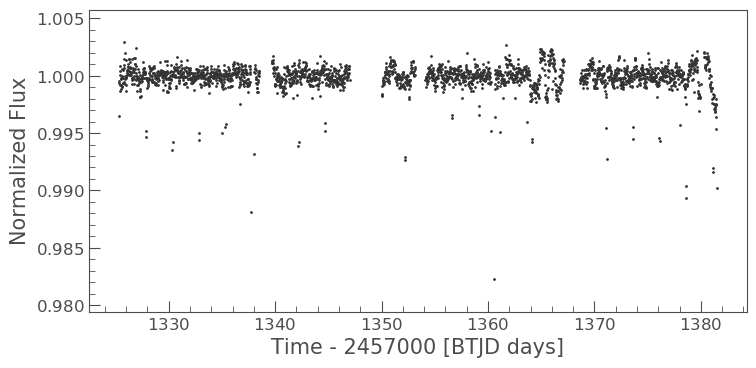

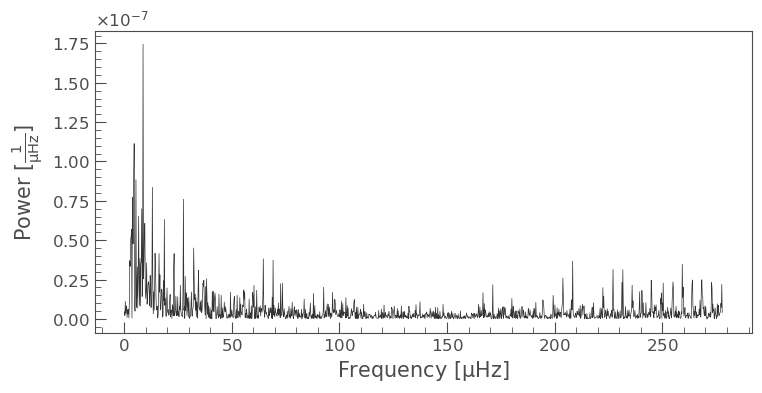

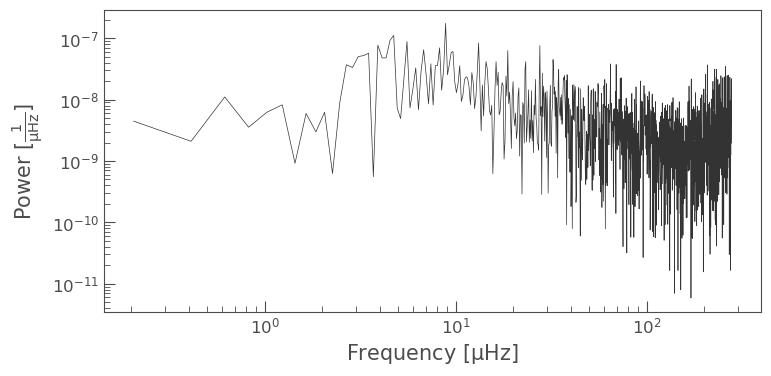

In [106]:
#Now to stitch the two sectors together and do same process..
combined_model = model1.append(model2)
combined_model.scatter()
power_combined = combined_model.to_periodogram(method='lombscargle', normalization="psd")
power_combined.plot()
power_combined.plot(scale='log')